# **Loading necessary Libraries**

In [ ]:
# In this section import all the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np


# **Load the dataset**

In [ ]:
# In this section load the dataset
df = pd.read_csv('telecom_dataset.csv')


# **Data Analysis**

In [ ]:
# In this section write down the code for basic data analysis i.e.,head(), describe(), info() and value_counts()
print("Basic Info:")
print(df.info())  # Displays information about the dataset
print("\nDescription of Numeric Features:")
print(df.describe())  # Displays statistical summary of numeric columns
print("\nFirst Five Rows:")
print(df.head())
print('\n vaule counts')
print(df['Churn'].value_counts())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nul

# **Histogram Plot**

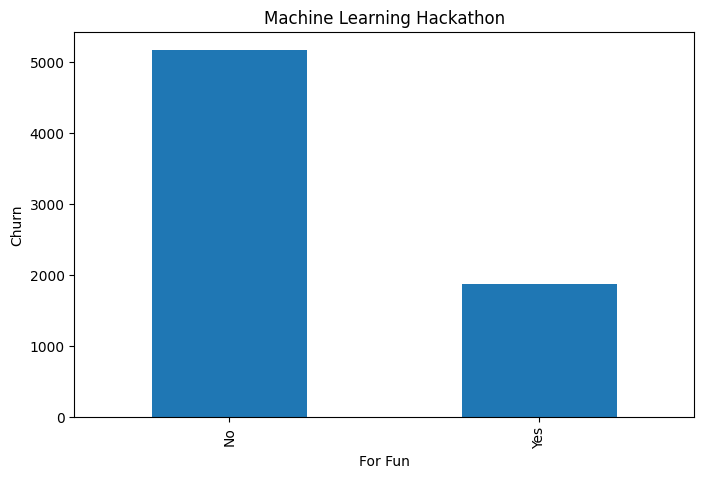

In [ ]:
# In this section plot the histogram of the output column of your dataset.
# X Axis title should be your Group Name
# Y Axis title should be Churn
# Plot title should be 'Machine Learning Hackathon'

output_label = 'Churn'  # Replace with the column name of the price range in your dataset
if output_label in df.columns:
    plt.figure(figsize=(8, 5))
    df[output_label].value_counts().sort_index().plot(kind='bar')
    plt.title("Machine Learning Hackathon")
    plt.xlabel("For Fun")
    plt.ylabel("Churn")
    plt.show()

# **Drop Columns**

In [ ]:
# In this section you can drop unnecessary columns
#df = df.drop(['customerID', 'PaymentMethod', 'Gender'])
df = df.drop(columns=['PaymentMethod'])
df = df.drop(columns=['Gender'])
df = df.drop(columns=['customerID'])
df = df.drop(columns=['PaperlessBilling'])

print(df)

      SeniorCitizen  Partner  Dependents  ...  MonthlyCharges  TotalCharges Churn
0                 0        1           0  ...           29.85         29.85    No
1                 0        0           0  ...           56.95        1889.5    No
2                 0        0           0  ...           53.85        108.15   Yes
3                 0        0           0  ...           42.30       1840.75    No
4                 0        0           0  ...           70.70        151.65   Yes
...             ...      ...         ...  ...             ...           ...   ...
7038              0        1           1  ...           84.80        1990.5    No
7039              0        1           1  ...          103.20        7362.9    No
7040              0        1           1  ...           29.60        346.45    No
7041              1        1           0  ...           74.40         306.6   Yes
7042              0        0           0  ...          105.65        6844.5    No

[7043 rows x 17

# **Preprocessing (Standardize Numerical Columns)**



In [ ]:
# In this section you can standardize numerical columns
#Print class labels before encoding
print('\n Before Encoding\n')
print(df['Churn'].head())

label_encoder = LabelEncoder()
df['Churn']=label_encoder.fit_transform(df['Churn'])
df['MultipleLines']=label_encoder.fit_transform(df['MultipleLines'])
df['InternetService']=label_encoder.fit_transform(df['InternetService'])
df['Contract']=label_encoder.fit_transform(df['Contract'])
df['TotalCharges']=label_encoder.fit_transform(df['TotalCharges'])
#Print class labels after encoding
print('\n After Encoding\n')
print(df['Churn'].head())





 Before Encoding

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

 After Encoding

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


# **Preprocessing (convert the categorical/*text* values to numeric)**

In [ ]:
# Encode the categorical/text data to numerical value using label encoder.
from sklearn.preprocessing import StandardScaler
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)
#df['TotalCharges'] = df['TotalCharges'].astype(float)

#Select Columns to standardize
cols_to_scale = ['MonthlyCharges', 'Tenure']
# Initialize scaler
scaler = StandardScaler()

#Standardize selected columns
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

print(df)

      SeniorCitizen  Partner  Dependents  ...  MonthlyCharges  TotalCharges  Churn
0                 0        1           0  ...       -1.160323          2505      0
1                 0        0           0  ...       -0.259629          1466      0
2                 0        0           0  ...       -0.362660           157      1
3                 0        0           0  ...       -0.746535          1400      0
4                 0        0           0  ...        0.197365           925      1
...             ...      ...         ...  ...             ...           ...    ...
7038              0        1           1  ...        0.665992          1597      0
7039              0        1           1  ...        1.277533          5698      0
7040              0        1           1  ...       -1.168632          2994      0
7041              1        1           0  ...        0.320338          2660      1
7042              0        0           0  ...        1.358961          5407      0

[70

# **Scatter Plot**

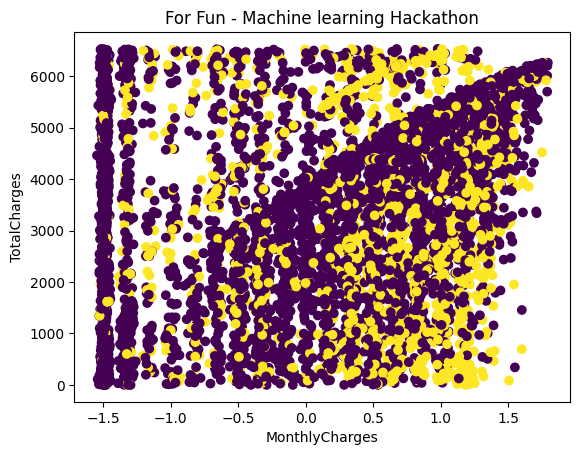

In [ ]:
# In this section plot the scatter chart between any two features.
# Use output column values for color coding the plot.
# X and Y Axis titles should be Feature Names
# Plot title should be 'Group Name - Machine Learning Hackathon'
#Check the features correlation using scatter plot
plt.figure()
plt.scatter(df['MonthlyCharges'],df['TotalCharges'], c =[df['Churn']])
plt.title('For Fun - Machine learning Hackathon')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.show()


# **Separate features(inputs) and output classes**

In [ ]:
# define your features(inputs) as x and output as y.
x = df.drop('Churn', axis=1)
#axis=1 selects the column values of data labelled class
y = df['Churn']



# **Split the data into training and testing**



In [ ]:
# Use The train and test split function to create a 70-30 split for the dataset with random_state 10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)
print(x_train.shape)
print(x_test.shape)




(4930, 16)
(2113, 16)


# **Load the Machine Learning Model. Then train and test the model**

In [ ]:
# Load the machine learning model according to your project.
# Train the above model using the training data.
# Test your model and make predictions.
from sklearn import tree

model_DT = tree.DecisionTreeClassifier(random_state=10)
model_DT.fit(x_train, y_train)
y_pred_DT = model_DT.predict(x_test)





In [ ]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(random_state=10)
model_LR.fit(x_train, y_train)
y_pred_LR = model_LR.predict(x_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(x_train,y_train)
y_pred_NB = model_NB.predict(x_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_kNN = KNeighborsClassifier(n_neighbors=5)
# value of n_neighbors can be different
model_kNN.fit(x_train,y_train)
y_pred_kNN = model_kNN.predict(x_test)



# **Evaluate the model (Check Accuracy)**

In [ ]:
# Calculate the accuracy and display the result.
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_pred_NB)
print("Accuracy of NAÏVE BAYES: ", accuracy1)

accuracy2 = accuracy_score(y_test, y_pred_LR)
print("Accuracy of Logistic Regression: ", accuracy2)

accuracy3 = accuracy_score(y_test, y_pred_DT)
print("Accuracy of Decision Tree: ", accuracy3)

accuracy4 = accuracy_score(y_test, y_pred_kNN)
print("Accuracy of K-NEAREST NEIGHBOR : ", accuracy4)

Accuracy of NAÏVE BAYES:  0.750591575958353
Accuracy of Logistic Regression:  0.795551348793185
Accuracy of Decision Tree:  0.7288215806909607
Accuracy of Decision Tree:  0.7108376715570279


# **Evaluate the model (Check F1_Score Matrix).**

In [ ]:
# Calculate the F1_score and display the result.
# Calculate the Confusion Matrix
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix




print('F1 score and Confusion Martix for Logistic Regression')
cm2 = confusion_matrix(y_test, y_pred_LR)
print("Confusion Matrix: \n", cm2)
# Calculate the F1_Score
fs2 = f1_score(y_test, y_pred_LR, average='weighted')
print("F1 Score: ", fs2)

print('F1 score and Confusion Martix for Decision Tree')
cm3 = confusion_matrix(y_test, y_pred_DT)
print("Confusion Matrix: \n", cm3)
# Calculate the F1_Score
fs3 = f1_score(y_test, y_pred_DT, average='weighted')
print("F1 Score: ", fs3)

print('F1 score and Confusion Martix for NAÏVE BAYES')
cm1 = confusion_matrix(y_test, y_pred_NB)
print("Confusion Matrix: \n", cm1)
#Calculate the F1_Score
fs1 = f1_score(y_test, y_pred_NB, average='weighted')
print("F1 Score: ", fs1)

print('F1 score and Confusion Martix for K-NEAREST NEIGHBOR  ')
cm4 = confusion_matrix(y_test, y_pred_kNN)
print("Confusion Matrix: \n", cm4)
# Calculate the F1_Score
fs4 = f1_score(y_test, y_pred_kNN, average='weighted')
print("F1 Score: ", fs4)

F1 score and Confusion Martix for Logistic Regression
Confusion Matrix: 
 [[1401  155]
 [ 277  280]]
F1 Score:  0.7868357344422782
F1 score and Confusion Martix for Decision Tree
Confusion Matrix: 
 [[1280  276]
 [ 297  260]]
F1 Score:  0.7271253143885851
F1 score and Confusion Martix for NAÏVE BAYES
Confusion Matrix: 
 [[1214  342]
 [ 185  372]]
F1 Score:  0.7593700661109999
F1 score and Confusion Martix for K-NEAREST NEIGHBOR  
Confusion Matrix: 
 [[1371  185]
 [ 426  131]]
F1 Score:  0.6813165642236633


In [ ]:
#Read me
#Do to an error in the data set I was not able to scale an important factor which affected the results
